# Characters Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of the lab on SVM: Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) a dataset of traditional japanese handwritten kana.

The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  1.0


In [2]:
# helper function to load KMNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Set as seed for the random generator your Student ID (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 2058080
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the K-MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the K-MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labels)
print("Frequencies in test set: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [70 64 63 57 59 59 49 54 58 67]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [70 64 63 57 59 59 49 54 58 67]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


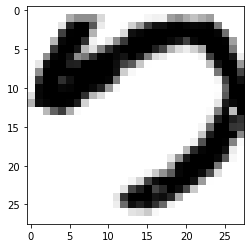

LABEL: 3
INPUT:


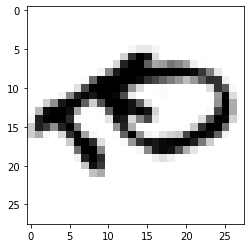

LABEL: 7
INPUT:


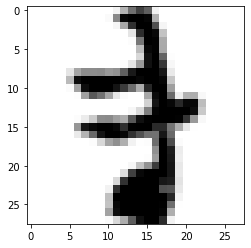

LABEL: 6


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
parameters = {'hidden_layer_sizes': [(10,), (20,), (40,), (20,20,), (40,20,10) ]}

mlp = MLPClassifier(max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)


g = GridSearchCV(mlp, parameters, cv = 5)
g.fit(X_train, y_train)

print ('RESULTS FOR NN\n')

print("Best parameters set found:", g.best_params_)

print("Score with best parameters:", g.best_score_)

print("\n All scores on the grid [mean_test_score]:", g.cv_results_["mean_test_score"])

/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


RESULTS FOR NN

Best parameters set found: {'hidden_layer_sizes': (40,)}
Score with best parameters: 0.7416666666666666

 All scores on the grid [mean_test_score]: [0.675      0.71833333 0.74166667 0.72666667 0.66833333]


### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
parameters = {'batch_size': [1, 32, 480]}

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

mlp = MLPClassifier(hidden_layer_sizes=g.best_params_.get("hidden_layer_sizes"), max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1)


# recall to use cv=kf to use the k-fold subdivision seen in the lectures

gbest = GridSearchCV(mlp, parameters, cv = kf)
gbest.fit(X_train, y_train)


print ('RESULTS FOR NN\n')

print("Best parameters set found:", gbest.best_params_)

print("Score with best parameters:", gbest.best_score_)

print("\n All scores on the grid [mean_test_score]:", gbest.cv_results_["mean_test_score"])

/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleono

RESULTS FOR NN

Best parameters set found: {'batch_size': 32}
Score with best parameters: 0.735

 All scores on the grid [mean_test_score]: [0.10166667 0.735      0.725     ]


### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

## [ANSWER TO QUESTION 1]

The best architecture is the one having 40 neurons in the hidden layer (the result however depends on the seed chosen). We analyze the results corresponding to different architectures using the results $[mean \_ test \_ score]$. We see that fewer neurons or too complex structures of the neural network result in worse performance, with lower accuracy. We also can see that with 100 iterations the algorithm does not always converge, however increasing the number to 500 the algorithm converges.

Also for the minibatch size, we can see that with 100 iterations the algorithm does not always converge, however increasing the number to 500 the algorithm converges. The best results obtained correspond to the minibatch size of 32. We see that the SGD, corresponding to minibatch size 1, gives the lowest accuracy. We can see however that there is actually no big difference in the accuracy result for a minibatch of size 32 or 480: this means that for a training set size of 600 the standard gradient descent performs well, and we can use it without having to keep into account the computation complexity.

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 100 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...
Done, training time: 0.78 sec

Training MLP of size (20,) ...
Done, training time: 0.58 sec

Training MLP of size (40,) ...
Done, training time: 0.53 sec

Training MLP of size (20, 20) ...
Done, training time: 0.25 sec

Training MLP of size (40, 20, 10) ...
Done, training time: 1.07 sec



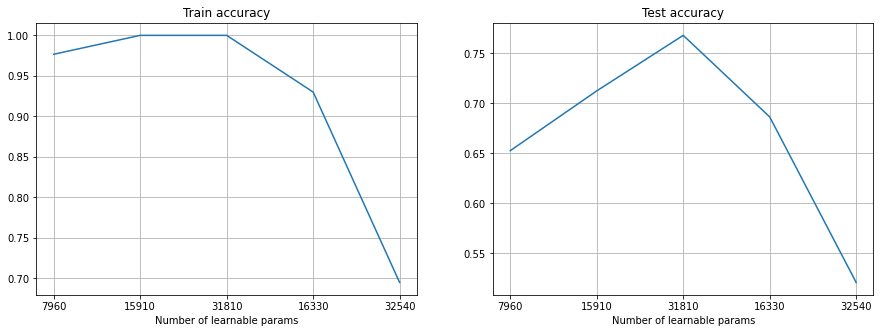

In [10]:
import time
from functools import reduce

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (40,), (20,20,), (40,20,10)]
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list = [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))

    mlp = MLPClassifier(hidden_layer_sizes=hl_size, max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=.1, batch_size = gbest.best_params_.get("batch_size"))
    mlp.fit(X_train, y_train)
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    print('Done, training time: {:.2f} sec\n'.format(time.time()-ti))
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)

## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

## [ANSWER TO QUESTION 2]

The model having the worst training accuracy is the more complex one, having 3 layers of size respectively 40, 20, 10. This model has also the worst test accuracy.

The training accuracy is already high for the simplest model having just 1 layer composed of 10 neurons.
The accuracy increases and becomes 1 adding neurons to the layer, indicating that the netwotk has learnt the data, which is the phenomenon of overfitting. The accuracy then decreases adding layers (which does not always correspond to an increased number of parameters).parameters
In correspondence of the performance decrease in the training set, we see that a decrease in the test accuracy. The worse performances can be due to the greater complexity of the model and the increased number of parameters: with the solver chosen (sgd) the optimization may not converge  an, increasing the number of parameters with the solver chosen may lead the optimization the optimization converge, finding a local minimum, that is not a global minimum.
We cannot talk about underfitting in this case since the worst performances are associated to the mostcomplex model, with a greater number of parameters. The worse results then are not due to a too small number of parameters.
We can also see that the computation time decreases, but in the last case corresponding to the most complex structure we see that the computation time is greater than all the others.

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 100 iterations. 

/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleono


RESULTS FOR NN

Best parameters set found: {'learning_rate_init': 0.002}
Score with best parameters: 0.7216666666666667

 All scores on the grid [mean_test_score]: [0.66833333 0.72166667 0.72166667 0.71333333]


/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


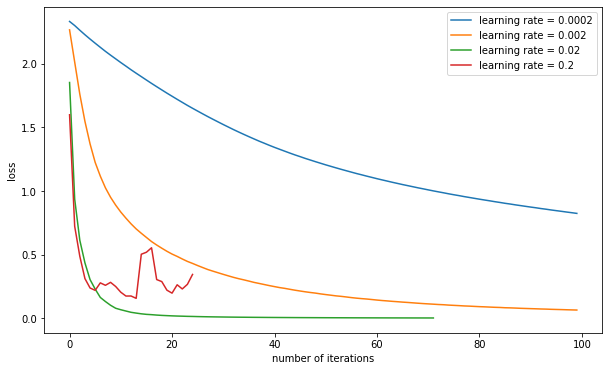

In [11]:
import matplotlib.pyplot as plt
import operator

lr_list = [0.0002, 0.002, 0.02, 0.2]
parameters = {"learning_rate_init":lr_list}

mlp = MLPClassifier(hidden_layer_sizes=g.best_params_.get("hidden_layer_sizes"), max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, batch_size = gbest.best_params_.get("batch_size"))
gs = GridSearchCV(mlp, parameters, cv = kf)
gs.fit(X_train, y_train)
print()


print ('RESULTS FOR NN\n')

print("Best parameters set found:", gs.best_params_)

print("Score with best parameters:", gs.best_score_)

print("\n All scores on the grid [mean_test_score]:", gs.cv_results_["mean_test_score"])

fig, ax = plt.subplots(figsize=(10, 6))

for l in lr_list:
    mlp = MLPClassifier(hidden_layer_sizes=g.best_params_.get("hidden_layer_sizes"), max_iter=100, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init=l, batch_size = gbest.best_params_.get("batch_size")) #n_iter_no_change = 50
    mlp.fit(X_train, y_train)
    ax.plot(mlp.loss_curve_, label = "learning rate = " + str(l))
ax.set_xlabel("number of iterations")
ax.set_ylabel("loss")
ax.legend()
plt.show()

### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

## [ANSWER TO QUESTION 3]

The learning rate corresponding to the best performances is 0.002. We can see that as expected the convergence of the algorithm is slower than the other cases with a greater learning rate.
We can see that using other learning rates the accuracy is actually similar, apart from the smallest one. A greater learning rate however corresponds to faster convergence of the algorithm.

We can see that for the learning rate of 0.2 the algorithm is very unstable with respect to the other cases, meaning that algorithm is more unstable.

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case (you can run the training for 500 iterations).


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.261000


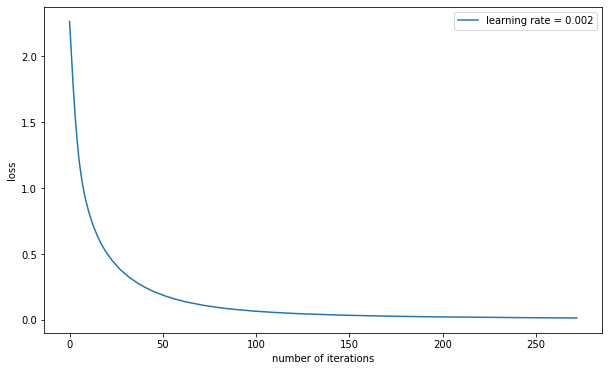

In [12]:
#get training and test error for the best NN model from CV

best_mlp = MLPClassifier(hidden_layer_sizes = g.best_params_.get("hidden_layer_sizes"), max_iter=500, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init = gs.best_params_.get("learning_rate_init"), batch_size = gbest.best_params_.get("batch_size"))
best_mlp.fit(X_train, y_train)

training_error = 1 - best_mlp.score(X_train, y_train)
test_error = 1 - best_mlp.score(X_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(best_mlp.loss_curve_, label = 'learning rate = ' + str(gs.best_params_.get("learning_rate_init")))
ax.set_xlabel("number of iterations")
ax.set_ylabel("loss")
ax.legend()
plt.show()

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [404 368 431 410 383 386 376 403 428 411]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).

In [14]:
mlp_data = MLPClassifier(hidden_layer_sizes = g.best_params_.get("hidden_layer_sizes"), max_iter=50, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID, learning_rate_init = gs.best_params_.get("learning_rate_init"), batch_size = gbest.best_params_.get("batch_size"))
mlp_data.fit(X_train, y_train)

training_error = 1 - mlp_data.score(X_train, y_train)
test_error = 1 - mlp_data.score(X_test, y_test)

print ('\nRESULTS FOR NN\n')


print ("NN training error: %f" % training_error)
print ("NN test error: %f" % test_error)


RESULTS FOR NN

NN training error: 0.016250
NN test error: 0.151750


/home/eleonora/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

#### [ANSWER TO QUESTION 4]

We can see that for less data the training and test errors are 0 and 0.261, and for more data, the errors are 0.016250 and 0.15.
A training error of 0 means that the algorithm has actually learned the data. In the case of a bigger training set, the training error is not 0 even if it is small (it actually decreases increasing the number of iterations and eventually goes to 0). However, the results on the test set obtained using more data are better. This is expected since we have more independent data to train the network.

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

INPUT:


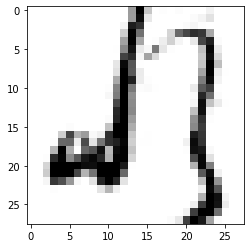

LABEL: 8
NN prediction:  5
large NN prediction:  8


In [15]:
NN_prediction = best_mlp.predict(X_test)
large_NN_prediction = mlp_data.predict(X_test)

idx_misc = -2
i = 0

while ((idx_misc != -1) and (i < len(y_test))):
    if (NN_prediction[i] != large_NN_prediction[i] and large_NN_prediction[i] == y_test[i]):
        idx_misc = -1
        plot_input(X_test,y_test, i)
        print("NN prediction: ", NN_prediction[i])
        print("large NN prediction: ", large_NN_prediction[i])
    i += 1

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


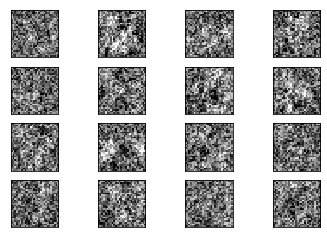

Weights with 4000 data points:


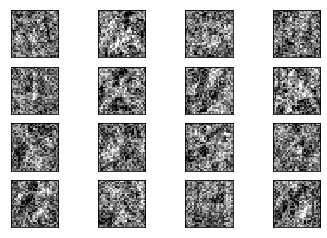

In [16]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = best_mlp.coefs_[0].min(), best_mlp.coefs_[0].max()
for coef, ax in zip(best_mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_data.coefs_[0].min(), mlp_data.coefs_[0].max()
for coef, ax in zip(mlp_data.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

##### [ANSWER TO QUESTION 5]

Looking at the weights we can sometimes recognize patterns formed by dark and light areas. In most cases, however, we are not able to recognize a pattern.
The algorithm may be trying to detect the curves and the shapes of the characters.

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [17]:
m_training = 5000

X_train, X_test = X[:m_training], X[m_training:2*m_training]
y_train, y_test = y[:m_training], y[m_training:2*m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

best_SVM = SVC(kernel = "rbf", C = 10, gamma = 0.01) # USE YOUR OPTIMAL PARAMETERS
best_SVM.fit(X_train, y_train)


print ('RESULTS FOR SVM')

SVM_training_error = 1 - best_SVM.score(X_train, y_train)

print("Training score SVM:")
print(SVM_training_error)

SVM_test_error = 1 - best_SVM.score(X_test, y_test)
print("Test score SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training score SVM:
0.0
Test score SVM:
0.07399999999999995


In [18]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C = 1, max_iter = 500) #increase in max number of iterations otherwise it does not complete the task
regL2.fit(X_train, y_train)

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1 - regL2.score(X_train, y_train)
test_error = 1 - regL2.score(X_test, y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.025000
Test error (reg): 0.233400


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

The SVM gives the lowest training test error, 0.07. The NN then has a test error of 0.15 and the LR has the worse performance with an error of 0.23 even considering regularization. The corresponding training errors are 0, 0.016, and 0.025.
We can see the same trend in training and test performances with SVM being the best and LR the worse, however, the training errors are not so different and have less importance in the comparison.

The NN then is outperformed by the SVM, probably because a NN is more complex. Nonetheless, the NN gives better results than the RL with regularization.